## Week 6

Practice around with the Hudgkin-Huxley model. 
Figures etc. can be found here: https://crossley.github.io/cogs3020/tutorials/tutorial_6.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


1. Recreate the figures (Activation gates and conductances)

In [10]:
def simulate_hh(params, I=None):

    tau = params['tau']
    vr = params['vr']
    C = params['C']
    g_na = params['g_na']
    g_k = params['g_k']
    g_leak = params['g_leak']
    E_na = params['E_na'] + vr
    E_k = params['E_k'] + vr
    E_leak = params['E_leak'] + vr

    if I is None:
      T = 15
      t = np.arange(0, T, tau)
      I = [5] * t.shape[0]
    else:
      t = np.arange(0, I.shape[0] // tau, tau)
      t = t[:I.shape[0]]
      T = t[-1]

    h = np.zeros(t.shape)
    m = np.zeros(t.shape)
    n = np.zeros(t.shape)
    v = np.zeros(t.shape)

    v[0] = vr
    h[0] = alpha_func_h(v[0], vr) / (alpha_func_h(v[0], vr) + beta_func_h(v[0], vr))
    m[0] = alpha_func_m(v[0], vr) / (alpha_func_m(v[0], vr) + beta_func_m(v[0], vr))
    n[0] = alpha_func_n(v[0], vr) / (alpha_func_n(v[0], vr) + beta_func_n(v[0], vr))

    for i in range(1, t.shape[0]):

        I_na = g_na * h[i - 1] * m[i - 1]**3 * (v[i - 1] - E_na)
        I_k = g_k * n[i - 1]**4 * (v[i - 1] - E_k)
        I_leak = g_leak * (v[i - 1] - E_leak)

        dvdt = (I[i - 1] - (I_na + I_k + I_leak)) / C

        dhdt = alpha_func_h(v[i - 1], vr) * (1 - h[i - 1]) - beta_func_h( v[i - 1], vr) * h[i - 1]
        dmdt = alpha_func_m(v[i - 1], vr) * (1 - m[i - 1]) - beta_func_m( v[i - 1], vr) * m[i - 1]
        dndt = alpha_func_n(v[i - 1], vr) * (1 - n[i - 1]) - beta_func_n( v[i - 1], vr) * n[i - 1]

        # delta t
        dt = t[i] - t[i - 1]

        # Euler's update
        v[i] = v[i - 1] + dvdt * dt
        h[i] = h[i - 1] + dhdt * dt
        m[i] = m[i - 1] + dmdt * dt
        n[i] = n[i - 1] + dndt * dt

    return t, v, h, m, n


def alpha_func_h(v, vr):
    y = 0.07 * np.exp((vr - v) / 20)
    return y


def alpha_func_m(v, vr):
    y = (2.5 - 0.1 * (v - vr)) / (np.exp(2.5 - 0.1 * (v - vr)) - 1)
    return y


def alpha_func_n(v, vr):
    y = (0.1 - 0.01 * (v - vr)) / (np.exp(1.0 - 0.1 * (v - vr)) - 1)
    return y


def beta_func_h(v, vr):
    y = 1 / (1 + np.exp(3 - 0.1 * (v - vr)))
    return y


def beta_func_m(v, vr):
    y = 4 * np.exp((vr - v) / 18)
    return y


def beta_func_n(v, vr):
    y = 0.125 * np.exp((vr - v) / 80)
    return y


def plot_res(param_name):

    fig, ax, = plt.subplots(2, 3, squeeze=False, figsize=(12, 6))

    ax[0, 0].plot(t1, v1, '.')
    ax[0, 1].plot(t2, v2, '.')
    ax[0, 2].plot(t3, v3, '.')

    ax[1, 0].plot(t1, n1, '-', label='n (K activation)')
    ax[1, 1].plot(t2, n2, '-', label='n (K activation)')
    ax[1, 2].plot(t3, n3, '-', label='n (K activation)')

    ax[1, 0].plot(t1, m1, '-', label='m (Na activation)')
    ax[1, 1].plot(t2, m2, '-', label='m (Na activation)')
    ax[1, 2].plot(t3, m3, '-', label='m (Na activation)')

    ax[1, 0].plot(t1, h1, '-', label='h (Na inactivation)')
    ax[1, 1].plot(t2, h2, '-', label='h (Na inactivation)')
    ax[1, 2].plot(t3, h3, '-', label='h (Na inactivation)')

    [x.set_xlabel('t') for x in ax.flatten()]
    [x.set_ylabel('v') for x in ax.flatten()[:3]]
    [x.set_ylabel('conductance') for x in ax.flatten()[3:]]
    title_list = ['A', 'B', 'C']
    [x.set_title(title_list[i]) for i, x in enumerate(ax.flatten()[0:3])]
    [x.legend(loc='upper right') for x in ax.flatten()[3:]]
    plt.tight_layout()
    plt.show()

In [11]:
# default parameters
params_base = {
    'tau': 0.01,
    'vr': -65,
    'C': 1,
    'g_na': 120,
    'g_k': 36,
    'g_leak': 0.3,
    'E_na': 115,
    'E_k': -12,
    'E_leak': 10.6
}

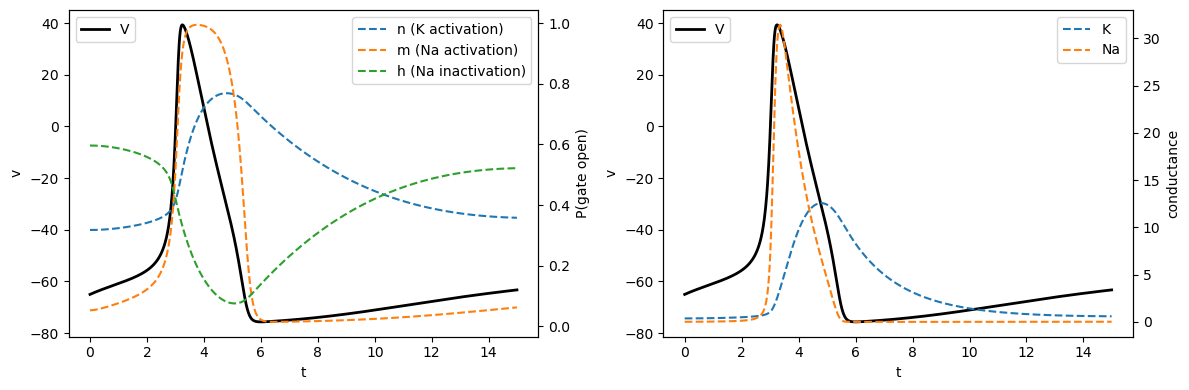

In [12]:
g_k = params_base['g_k']
g_na = params_base['g_na']
t, v, h, m, n = simulate_hh(params_base)

fig, ax, = plt.subplots(1, 2, squeeze=False, figsize=(12, 4))

ax1 = ax[0, 0]
ax1.plot(t, v, '-k', linewidth=2, label='V')
ax1.set_ylabel('v')
ax1.set_xlabel('t')
ax2 = ax1.twinx()
ax2.plot(t, n, '--', label='n (K activation)')
ax2.plot(t, m, '--', label='m (Na activation)')
ax2.plot(t, h, '--', label='h (Na inactivation)')
ax2.set_ylabel('P(gate open)')
ax2.set_xlabel('t')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1 = ax[0, 1]
ax1.plot(t, v, '-k', linewidth=2, label='V')
ax1.set_ylabel('v')
ax1.set_xlabel('t')
ax2 = ax1.twinx()
ax2.plot(t, g_k * n**4, '--', label='K')
ax2.plot(t, g_na * m**3 * h, '--', label='Na')
ax2.set_xlabel('t')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()